In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../input/motorcycle-dataset/BIKE DETAILS.csv')

In [3]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Let's drop the 'ex_showroom_price' column, since it has a whole lot of missing values and personally I believe that this feature is not going to be presenting too much of a contribution to my model.

In [5]:
df = df.drop('ex_showroom_price', axis = 1)

In [6]:
df.isnull().sum()

name             0
selling_price    0
year             0
seller_type      0
owner            0
km_driven        0
dtype: int64

# Dealing with outliers

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

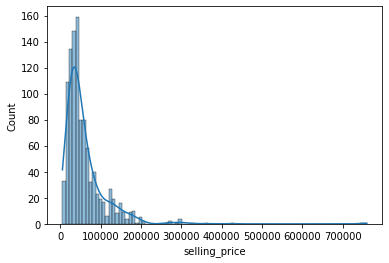

In [7]:
sns.histplot(df['selling_price'], kde = True)

It seems that we do have some outliers which have the potential to cause variance to be larger than what we need.

So, let's remove the outliers in the selling_price column.

In [8]:
q = df['selling_price'].quantile(0.975)
df_2 = df[df['selling_price'] < q]
df_2.describe(include = 'all')

,name,selling_price,year,seller_type,owner,km_driven
count,1030,1030.000000,1030.000000,1030,1030,1030.000000
unique,265,NaN,NaN,2,4,NaN
top,Bajaj Pulsar 150,NaN,NaN,Individual,1st owner,NaN
freq,41,NaN,NaN,1024,900,NaN
mean,NaN,53346.678641,2013.761165,NaN,NaN,35181.764078
std,NaN,36037.408053,4.295821,NaN,NaN,52159.074675
min,NaN,5000.000000,1988.000000,NaN,NaN,350.000000
25%,NaN,27000.000000,2011.000000,NaN,NaN,14500.000000
50%,NaN,42000.000000,2015.000000,NaN,NaN,25000.000000
75%,NaN,68750.000000,2017.000000,NaN,NaN,44000.000000


<AxesSubplot:xlabel='selling_price', ylabel='Count'>

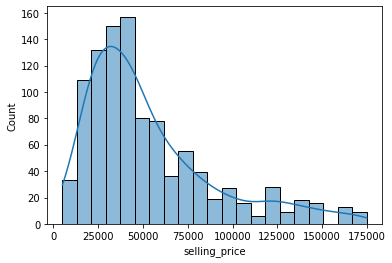

In [9]:
sns.histplot(df_2['selling_price'], kde = True)

So, we do have a better distributed price column now.

I am going to be checking the same outliers in other columns, too.

<AxesSubplot:xlabel='km_driven', ylabel='Count'>

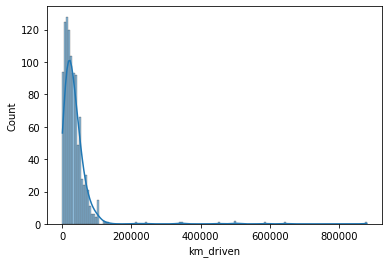

In [10]:
sns.histplot(df_2['km_driven'],kde = True)

<AxesSubplot:xlabel='km_driven', ylabel='Count'>

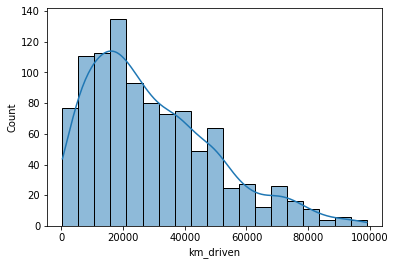

In [11]:
df_3 = df_2[df_2['km_driven'] < 100000]
sns.histplot(df_3['km_driven'], kde = True)

Now we have a more normally distributed km_driven column.

In [12]:
r = df_3['year'].quantile(0.01)
df_4 = df_3[df_3['year'] > r]

In [13]:
df_no_outlier = df_4

In [14]:
df_no_outlier.describe(include= 'all')

,name,selling_price,year,seller_type,owner,km_driven
count,986,986.000000,986.000000,986,986,986.000000
unique,255,NaN,NaN,2,3,NaN
top,Bajaj Pulsar 150,NaN,NaN,Individual,1st owner,NaN
freq,40,NaN,NaN,982,869,NaN
mean,NaN,54242.383367,2014.130832,NaN,NaN,29451.018256
std,NaN,35887.881558,3.704863,NaN,NaN,20398.384830
min,NaN,6000.000000,2001.000000,NaN,NaN,350.000000
25%,NaN,29925.000000,2012.000000,NaN,NaN,14000.000000
50%,NaN,45000.000000,2015.000000,NaN,NaN,25000.000000
75%,NaN,70000.000000,2017.000000,NaN,NaN,40000.000000


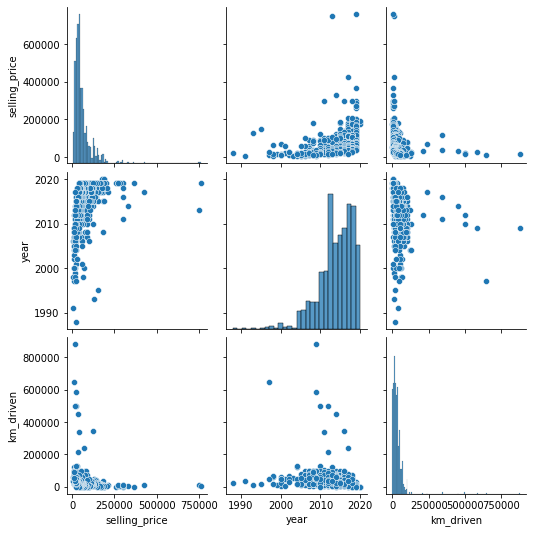

In [15]:
sns.pairplot(df)

# Creating the dummy variables

In [16]:
df_object = df_no_outlier.select_dtypes(include = 'object')
df_numeric = df_no_outlier.select_dtypes (exclude = 'object')

In [17]:
df_object_dummies = pd.get_dummies(df_object, drop_first=True)

In [18]:
df_object_dummies

,name_Activa 4g,name_Aprilia SR 125,name_Bajaj ct 100,name_Bajaj Avenger 150,name_Bajaj Avenger 150 street,name_Bajaj Avenger 220,name_Bajaj Avenger 220 dtsi,name_Bajaj Avenger Cruise 220,name_Bajaj Avenger Street 150 [2018],name_Bajaj Avenger Street 160,...,name_Yamaha Saluto,name_Yamaha Saluto RX,name_Yamaha YBR 125,name_Yamaha YZF R15 S,name_Yamaha YZF R15 V3,name_Yamaha YZF R15 [2011-2018],name_Yo Style,seller_type_Individual,owner_2nd owner,owner_3rd owner
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
final_df = pd.concat([df_numeric, df_object_dummies], axis = 1)

In [20]:
final_df.describe(include = 'all')

,selling_price,year,km_driven,name_Activa 4g,name_Aprilia SR 125,name_Bajaj ct 100,name_Bajaj Avenger 150,name_Bajaj Avenger 150 street,name_Bajaj Avenger 220,name_Bajaj Avenger 220 dtsi,...,name_Yamaha Saluto,name_Yamaha Saluto RX,name_Yamaha YBR 125,name_Yamaha YZF R15 S,name_Yamaha YZF R15 V3,name_Yamaha YZF R15 [2011-2018],name_Yo Style,seller_type_Individual,owner_2nd owner,owner_3rd owner
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,...,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,54242.383367,2014.130832,29451.018256,0.001014,0.002028,0.001014,0.001014,0.001014,0.003043,0.002028,...,0.003043,0.001014,0.002028,0.006085,0.002028,0.006085,0.001014,0.995943,0.110548,0.008114
std,35887.881558,3.704863,20398.384830,0.031846,0.045015,0.031846,0.031846,0.031846,0.055104,0.045015,...,0.055104,0.031846,0.045015,0.077809,0.045015,0.077809,0.031846,0.063596,0.313730,0.089755
min,6000.000000,2001.000000,350.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29925.000000,2012.000000,14000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,45000.000000,2015.000000,25000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,70000.000000,2017.000000,40000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,175000.000000,2020.000000,99000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
final_df.corr()['selling_price'].sort_values()

km_driven                             -0.456714
name_Hero Honda Splendor Plus         -0.120823
name_Honda Activa [2000-2015]         -0.116000
owner_2nd owner                       -0.112209
name_Bajaj Discover 125               -0.096871
                                         ...   
name_Royal Enfield Thunderbird 350     0.189076
name_Royal Enfield Thunderbird 350X    0.235840
name_Royal Enfield Classic 350         0.349870
year                                   0.556753
selling_price                          1.000000
Name: selling_price, Length: 260, dtype: float64

From the correlation tables above, it is apparent that the most positively correlated feature is 'year' and the most negatively correlated feature is the 'km_driven'. This could be expected at the begining of the EDA, since it is highly possible that the more a motorcycle is used (meaning higher km), the less price it will have and on the same token, the newer a motorcycle is, the higher its value in terms of selling price.

# Splitting the Dataset

In [22]:
df = final_df

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 1060
Columns: 260 entries, selling_price to owner_3rd owner
dtypes: int64(3), uint8(257)
memory usage: 278.3 KB


In [24]:
X = df.drop('selling_price', axis = 1)

In [25]:
y = df['selling_price']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In order to avoid any data leakage, we are not scaling the whole X features, but we are scaling the train and test features separately.

# Elastic Net Model

In [31]:
from sklearn.linear_model import ElasticNet

In [32]:
base_elastic_model = ElasticNet()

In [33]:
param_grid = {'alpha':[0.1,1,5,10,100], 'l1_ratio': [.1,.7,.99,1]}

# Grid Search

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
grid_model = GridSearchCV(base_elastic_model,
                          param_grid = param_grid,
                          scoring = 'neg_mean_squared_error',
                          cv = 5, verbose = 1)

In [36]:
grid_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5668425413.272163, tolerance: 77645810.31430937
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6158665052.4499855, tolerance: 80768493.70223556
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9071086023.024609, tolerance: 84376643.82043429
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not conver

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 100],
                         'l1_ratio': [0.1, 0.7, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [37]:
grid_model.best_params_

{'alpha': 5, 'l1_ratio': 0.99}

# Model Evaluation

After we created our model, it is suitable to evaluate it.

In [38]:
y_pred = grid_model.predict(scaled_X_test)

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [40]:
mean_absolute_error(y_test,y_pred)

11065.34284441855

In [41]:
np.sqrt(mean_squared_error(y_test,y_pred))

17700.670994484775

# Evaluation

In order to quantitatively comment on the evaluation of the model, I will be taking the mean of the selling_price and then divide the mean_absolute_error (in this case 11065.34284441855) with the mean of the selling_price.

In [42]:
11065.34284441855 / np.mean(df['selling_price'])


0.20399809443332712

So, our model has a roughly 20 % of mean_absolute_error. This means that the model needs to be re-formulated and perhaps some other parameters should be used. Because I believe 20 % is a bit over the tolerable percentage.